In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

/var/folders/hv/1_92kz110w572ncggsb_c81c0000gp/T/ipykernel_96085/2103690434.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Spread Formula

In [2]:
def s(R, T, CD):
    return -(1-R) / T * np.log(1-CD)

R = 0.4
T = 5
CD = [0.10/100, 0.2/100, 0.7/100, 1.9/100, 11.9/100, 21.4/100]

In [4]:

def question_spread(R, T, CD):
    data = [s(R, T, CD) for CD in CD]
    return pd.DataFrame(data = data, index = ["AAA", "AA", "A", "Baa", "Ba", "All"], columns=["Spread"])


question_spread(R, T, CD)

,Spread
AAA,0.000120
AA,0.000240
A,0.000843
Baa,0.002302
Ba,0.015204
All,0.028896


### Exercice of changes in asset risk on debt value

#### 

In [35]:
import math
import matplotlib.pyplot as plt

def black_scholes(S, K, T, r, sigma, option='call'):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    
    if option == 'call':
        return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    if option == 'put':
        return K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


In [37]:
def RSI(S, K, sigma, T, r, Kappa):
   return (black_scholes(S, K, T, r, sigma = (sigma + Kappa)) / black_scholes(S, K, T, r, sigma = sigma)) - 1

T = 1

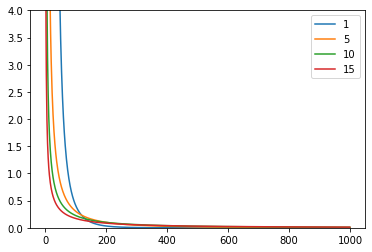

In [48]:
T = [1, 5, 10, 15]
V = np.linspace(1, 1000, 1000)

K = 100 # F
sigmaV = 0.4
r = 0.05
Kappa = 0.20
for T in T:
    res = [RSI(V, K, sigma = sigmaV, T= T, r = r, Kappa=Kappa) for V in V]
    plt.plot(res, label = T)
    plt.legend()
    plt.ylim(top = 4, bottom = 0)
    